### Boston House Price Regression
- datasets: '../data/boston.csv'
- 
- learning method: supervised learning, regression
    - learning algorithm: linear regression, ANN linaer regression (MLP)
    - optimizer: adam
    - activation function: sigmoid
- scaling: True
    - scaling algorithm: Standard scaling
- feateure: boston_df.columns[:-1]
- label: boston_df.columns[-1]
- 
- model realization method: Pytorch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optima

from torchmetrics.regression import R2Score
from torchinfo import summary

In [3]:
FILE_PATH = '../data/boston.csv'

boston_df = pd.read_csv(FILE_PATH)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# feature & label
feature_df = boston_df[boston_df.columns[:-1]]
label_sr = boston_df[[boston_df.columns[-1]]]

print(f"feature: {feature_df.shape}, {feature_df.ndim}D")
print(f"label: {label_sr.shape}, {label_sr.ndim}D")

feature: (506, 13), 2D
label: (506, 1), 2D


In [6]:
# train : test = 8 : 2
# random_state: 28
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr, test_size=0.2, random_state=28)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train & test ratio: {X_train.shape[0]/feature_df.shape[0]*100:.2f} %, {X_test.shape[0]/feature_df.shape[0]*100:.2f} %\n\n")

# train : val = 8 : 2
# random_state: 28
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=28)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X validation : {X_val.shape}, {X_val.ndim}D")
print(f"y validation : {y_val.shape}, {y_val.ndim}D\n")
print(f"train & validatotn ratio: {X_train.shape[0]/(X_train.shape[0]+X_val.shape[0])*100:.2f} %, {X_val.shape[0]/(X_train.shape[0]+X_val.shape[0])*100:.2f} %")

X train: (404, 13), 2D
y train: (404, 1), 2D

X test: (102, 13), 2D
y test: (102, 1), 2D

train & test ratio: 79.84 %, 20.16 %


X train: (323, 13), 2D
y train: (323, 1), 2D

X validation : (81, 13), 2D
y validation : (81, 1), 2D

train & validatotn ratio: 79.95 %, 20.05 %


In [7]:
# scaling
sd_scalier = StandardScaler()
sd_scalier.fit(X_train, y_train)

StandardScaler()

In [8]:
sd_X_train = sd_scalier.transform(X_train)
sd_X_test = sd_scalier.transform(X_test)
sd_X_val = sd_scalier.transform(X_val)

In [9]:
# torch random seed: 28
torch.manual_seed(28)

# device
DEVICE = 'gpu' if torch.cuda.is_available() else 'cpu'
print(f"device: {DEVICE}")

device: cpu


In [233]:
# input feature: 13
# ouput feature: 1
# hidden layer: 3, perceptron: 30, 15, 10, 5
# activation function: sigmoid --> ReLU

nor_model = nn.Sequential(nn.Linear(13, 30),
                          nn.ReLU(),
                          nn.Linear(30, 15),
                          nn.ReLU(),
                          nn.Linear(15, 10),
                          nn.ReLU(),
                          nn.Linear(10, 5),
                          nn.ReLU(),
                          nn.Linear(5, 1))

sd_model = nn.Sequential(nn.Linear(13, 30),
                          nn.ReLU(),
                          nn.Linear(30, 15),
                          nn.ReLU(),
                          nn.Linear(15, 10),
                          nn.ReLU(),
                          nn.Linear(10, 5),
                          nn.ReLU(),
                          nn.Linear(5, 1))

In [234]:
print(nor_model)
summary(nor_model, input_size=(1, 13))

Sequential(
  (0): Linear(in_features=13, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=5, bias=True)
  (7): ReLU()
  (8): Linear(in_features=5, out_features=1, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 1]                    --
├─Linear: 1-1                            [1, 30]                   420
├─ReLU: 1-2                              [1, 30]                   --
├─Linear: 1-3                            [1, 15]                   465
├─ReLU: 1-4                              [1, 15]                   --
├─Linear: 1-5                            [1, 10]                   160
├─ReLU: 1-6                              [1, 10]                   --
├─Linear: 1-7                            [1, 5]                    55
├─ReLU: 1-8                              [1, 5]                    --
├─Linear: 1-9                            [1, 1]                    6
Total params: 1,106
Trainable params: 1,106
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

In [235]:
print(sd_model)
summary(sd_model, input_size=(1, 13))

Sequential(
  (0): Linear(in_features=13, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=5, bias=True)
  (7): ReLU()
  (8): Linear(in_features=5, out_features=1, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 1]                    --
├─Linear: 1-1                            [1, 30]                   420
├─ReLU: 1-2                              [1, 30]                   --
├─Linear: 1-3                            [1, 15]                   465
├─ReLU: 1-4                              [1, 15]                   --
├─Linear: 1-5                            [1, 10]                   160
├─ReLU: 1-6                              [1, 10]                   --
├─Linear: 1-7                            [1, 5]                    55
├─ReLU: 1-8                              [1, 5]                    --
├─Linear: 1-9                            [1, 1]                    6
Total params: 1,106
Trainable params: 1,106
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

In [236]:
# weight & bais
for name, param in nor_model.named_parameters():
    print(f"[{name}] {param}\n")

[0.weight] Parameter containing:
tensor([[ 0.2235, -0.1886, -0.1778,  0.2492,  0.1142,  0.1307, -0.2285,  0.2581,
          0.0646,  0.1201,  0.1033, -0.0196, -0.1346],
        [-0.2758,  0.1365,  0.2683, -0.0045, -0.1238, -0.1943,  0.2174,  0.2004,
         -0.2010, -0.0520,  0.2551, -0.2498,  0.0740],
        [-0.2762,  0.2152,  0.0410,  0.1149,  0.1677,  0.1782,  0.0398, -0.0151,
         -0.1879, -0.1137, -0.1691, -0.1805,  0.2391],
        [-0.2739, -0.0925,  0.2194, -0.0067, -0.2721,  0.0529, -0.2390,  0.2005,
          0.2773,  0.0061, -0.1378,  0.0041, -0.0312],
        [-0.0804, -0.0774, -0.0140, -0.0340,  0.2431,  0.1030, -0.2729,  0.1368,
         -0.2544,  0.2493,  0.2260, -0.1448,  0.1654],
        [-0.0919, -0.1924, -0.1572, -0.1502,  0.1213,  0.1576, -0.1841, -0.0234,
         -0.0532,  0.2174, -0.2305,  0.2379, -0.2259],
        [-0.2120,  0.0982,  0.1108, -0.1000, -0.2703,  0.2187, -0.0440,  0.2697,
          0.0078,  0.0400,  0.1004,  0.0822, -0.0848],
        [ 0.240

In [237]:
# optimizer algorithm: Adam
# learning rate: 0.01
nor_adam_op = optima.Adam(nor_model.parameters(), lr=0.01)
sd_adam_op = optima.Adam(sd_model.parameters(), lr=0.01)

In [238]:
EPOCH = 100
BATCH_SIZE = 20
BATCH_CNT = X_train.shape[0] // BATCH_SIZE   # X_train.shape[0]: 323

print(f"Epoch: {EPOCH}, Batch Size: {BATCH_SIZE}, Batch Count: {BATCH_CNT}")

Epoch: 100, Batch Size: 20, Batch Count: 16


In [239]:
def testing(test_df, label_df, model):
    
    with torch.no_grad():
        if model == sd_model:
                bs_X_test = torch.FloatTensor(test_df).to(DEVICE)
        else:
            bs_X_test = torch.FloatTensor(test_df.values).to(DEVICE)
        bs_y_test = torch.FloatTensor(label_df.values).to(DEVICE)
        
        pre_y = model(bs_X_test)
        
        loss = F.mse_loss(pre_y, bs_y_test)
        r2 = R2Score()(pre_y, bs_y_test)
            
    return loss, r2

In [240]:
# model learning function
def training(train_X_df, train_y_df, val_X_df, val_y_df, model, optimizer, kind='Val'):
    loss_history = [[], []]
    r2_history = [[], []]
    
    for epoch in range(EPOCH+1):
        bs_loss, bs_r2 = 0, 0
        for i in range(BATCH_CNT):
            start = i * BATCH_SIZE
            end = start + BATCH_SIZE
            
            if model == sd_model:
                bs_X_train = torch.FloatTensor(train_X_df[start:end]).to(DEVICE)
            else:
                bs_X_train = torch.FloatTensor(train_X_df[start:end].values).to(DEVICE)
            bs_y_train = torch.FloatTensor(train_y_df[start:end].values).to(DEVICE)
            
            pre_y = model(bs_X_train)
            
            train_loss = F.mse_loss(pre_y, bs_y_train)
            bs_loss += train_loss.item()
            bs_r2 += R2Score()(pre_y, bs_y_train).item()
            
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
            
        # validation
        val_loss, val_r2 = testing(val_X_df, val_y_df, model)
                
        loss_history[0].append(bs_loss/BATCH_CNT)
        r2_history[0].append(bs_r2/BATCH_CNT)
        
        loss_history[1].append(val_loss.item())
        r2_history[1].append(val_r2.item())
        
        
        if epoch%50 == 0:
            print(f"epoch: {epoch:5} train loss: {bs_loss:10.8f}")
            print(f"epoch: {epoch:5} {kind} loss: {val_loss.item():10.8f}")
            print(f"epoch: {epoch:5} {kind} R2 Score: {val_r2.item():10.8f}")
            
    return loss_history, r2_history

In [241]:
nor_loss, nor_r2 = training(X_train, y_train, X_val, y_val, nor_model, nor_adam_op)

epoch:     0 train loss: 4663.47183609
epoch:     0 Val loss: 133.55603027
epoch:     0 Val R2 Score: -0.47313380
epoch:    50 train loss: 311.73492050
epoch:    50 Val loss: 16.21047401
epoch:    50 Val R2 Score: 0.82119715
epoch:   100 train loss: 245.38799667
epoch:   100 Val loss: 13.56591034
epoch:   100 Val R2 Score: 0.85036695


In [242]:
sd_loss, sd_r2 = training(sd_X_train, y_train, sd_X_val, y_val, sd_model, sd_adam_op)

epoch:     0 train loss: 9912.23648071
epoch:     0 Val loss: 650.47271729
epoch:     0 Val R2 Score: -6.17476654
epoch:    50 train loss: 114.42370486
epoch:    50 Val loss: 9.82149220
epoch:    50 Val R2 Score: 0.89166814
epoch:   100 train loss: 86.94464254
epoch:   100 Val loss: 8.32332325
epoch:   100 Val R2 Score: 0.90819305


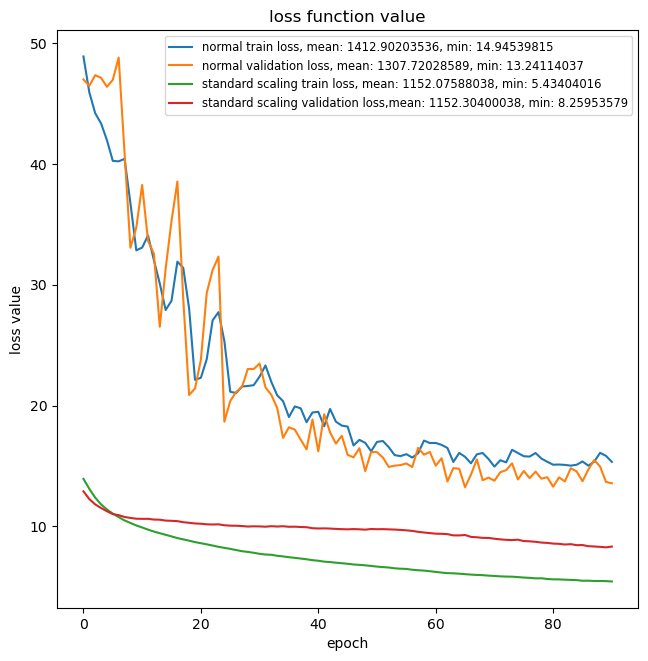

In [243]:
plt.figure(figsize=(7.5, 7.5))
plt.plot(nor_loss[0][10:], label=f'normal train loss, mean: {sum(nor_loss[0])/len(nor_loss):.8f}, min: {min(nor_loss[0]):.8f}')
plt.plot(nor_loss[1][10:], label=f'normal validation loss, mean: {sum(nor_loss[1])/len(nor_loss):.8f}, min: {min(nor_loss[1]):.8f}')
plt.plot(sd_loss[0][10:], label=f'standard scaling train loss, mean: {sum(sd_loss[0])/len(sd_loss):.8f}, min: {min(sd_loss[0]):.8f}')
plt.plot(sd_loss[1][10:], label=f'standard scaling validation loss,mean: {sum(sd_loss[1])/len(sd_loss):.8f}, min: {min(sd_loss[1]):.8f}')

plt.title('loss function value')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.legend(fontsize='small')
plt.show()

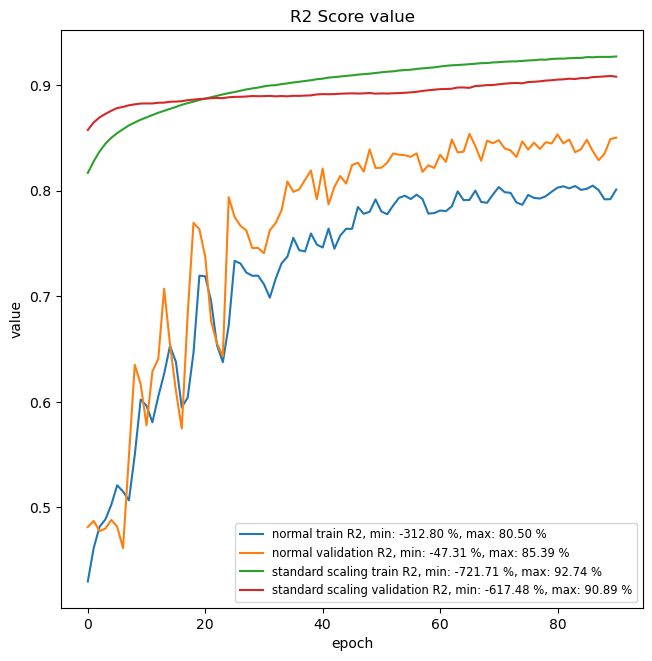

In [244]:
plt.figure(figsize=(7.5, 7.5))
plt.plot(nor_r2[0][10:], label=f'normal train R2, min: {min(nor_r2[0])*100:.2f} %, max: {max(nor_r2[0])*100:.2f} %')
plt.plot(nor_r2[1][10:], label=f'normal validation R2, min: {min(nor_r2[1])*100:.2f} %, max: {max(nor_r2[1])*100:.2f} %')
plt.plot(sd_r2[0][10:], label=f'standard scaling train R2, min: {min(sd_r2[0])*100:.2f} %, max: {max(sd_r2[0])*100:.2f} %')
plt.plot(sd_r2[1][10:], label=f'standard scaling validation R2, min: {min(sd_r2[1])*100:.2f} %, max: {max(sd_r2[1])*100:.2f} %')

plt.title('R2 Score value')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend(fontsize='small')
plt.show()

In [245]:
def draw_two_plot(loss, r2, title):
    
    # y_1 : 평균 평점, y_2: 평균 임금
    
    # 축을 2개 사용하고 싶음.
    fig, ax1 = plt.subplots(figsize=(7, 7))
    ax2 = ax1.twinx()
    
    ax1.plot(loss, label=f"mean: {sum(loss)/len(loss)}", color='#5587ED')
    ax2.plot(r2, label=f"max: {max(r2)*100:.2f} %", color='#00007F')
    
    fig.suptitle(f'{title} Loss Value & R2 Score', fontsize=15)
    ax1.set_ylabel('Loss Value', fontsize=10, color='#5587ED')
    ax2.set_ylabel('R2 Score', fontsize=10, color='#00007F')
    
    fig.legend(loc='center')
    plt.show()

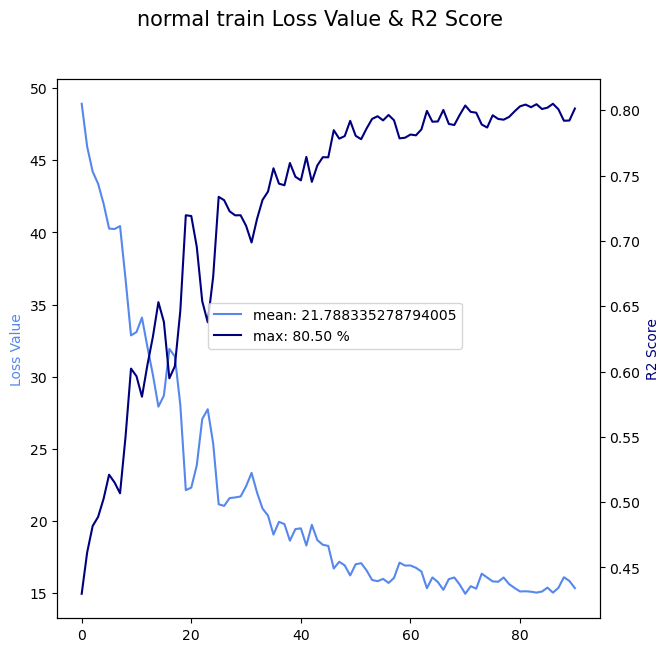

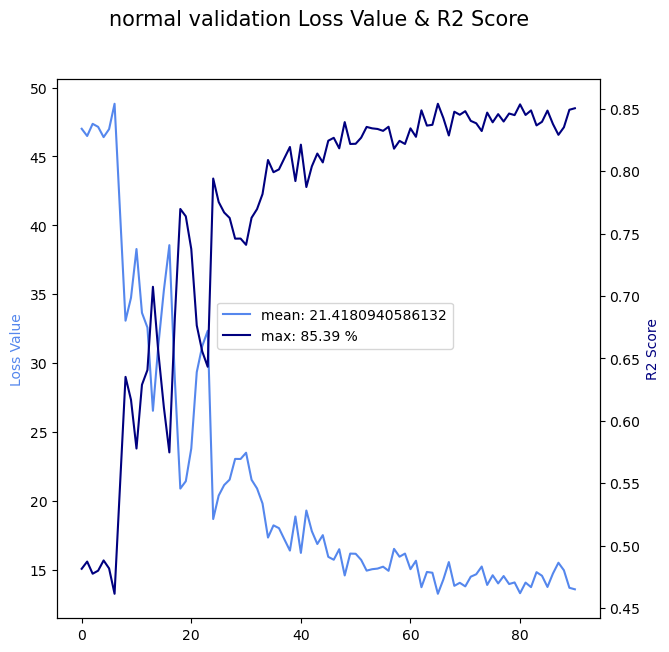

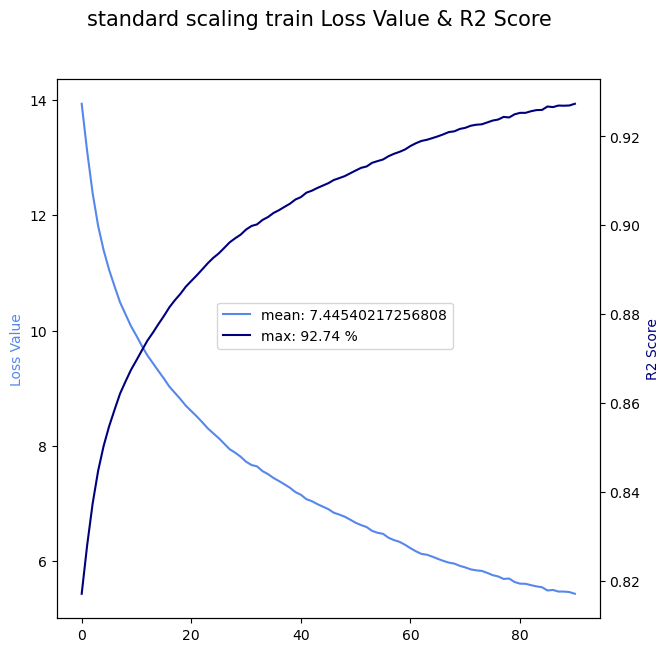

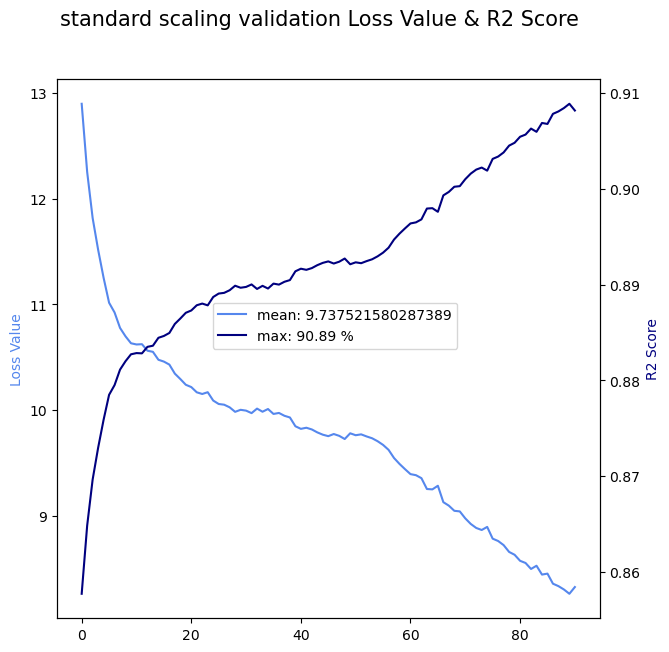

In [246]:
draw_two_plot(nor_loss[0][10:], nor_r2[0][10:], 'normal train')
draw_two_plot(nor_loss[1][10:], nor_r2[1][10:], 'normal validation')
draw_two_plot(sd_loss[0][10:], sd_r2[0][10:], 'standard scaling train')
draw_two_plot(sd_loss[1][10:], sd_r2[1][10:], 'standard scaling validation')

In [247]:
nor_test_loss, nor_test_r2 = testing(X_test, y_test, nor_model)
sd_test_loss, sd_test_r2 = testing(sd_X_test, y_test, sd_model)

print(f"normal test loss    : {nor_test_loss.item():10.8f}")
print(f"normal test R2 Score: {nor_test_r2.item()*100:.2f} %\n")
print(f"standard scaling test loss    : {sd_test_loss.item():10.8f}")
print(f"standard scaling test R2 Score: {sd_test_r2.item()*100:.2f} %")

normal test loss    : 25.31610870
normal test R2 Score: 63.44 %

standard scaling test loss    : 22.73960495
standard scaling test R2 Score: 67.16 %


- epoch: 1000, learning rate: 0.001
- layer: 3
    - activation function: ReLU
    - loss function: mean squared error
    - perceptron: 30, 10
- 
- batch_size: 20, batch_cnt: 16
    - sd_test_r2: 71.72 %
- batch_size: 25, batch_cnt: 12
    - sd_test_r2: 68.65 %
- batch_size: 23, batch_cnt: 14
    - sd_test_r2: 70.04 %
- batch_size: 18. batch_cnt: 17
    - sd_test_r2: 66.98%
- 
- epoch: 500
    - sd_test_r2: 70.98 5
- epoch: 1500
    - sd_tesr_r2: 63.98 %
- epoch: 800
    - sd_test_r2: 73.51 %
- epoch: 750
    - sd_test_t2: 73.63 %

- epoch: 750, learning rate: 0.001
    - layer: 5, perceptron: 30, 15, 10, 5
    - input: 13, output: 1
    - batch_size: 20, batch_cnt: 16
        - sd_test_r2: 58.63 %
- epoch: 1000
    - learning rate: 0.001
        - sd_test_r2: 67.88 %
    - learning rate: 0.01
        - sd_test_r2: 69.51 %
    - learning rate: 0.1
        - sd_test_r2: 11.23 %
- epoch: 1500
    - learning rete: 0.01
        - sd_test_r2: 63.30 %
- epoch: 1200
    - learning rate: 0.01
        - sd_test_r2: 65.75 %
    - learning rate: 0.001
        - sd_test_r2: 54.58 %
- epoch: 400
    - learning rate: 0.001
        - sd_test_r2: 69.77 %
    - learning rate: 0.01
        - sd_test_r2: 70.29 %
- epoch: 350
    - learning rate: 0.001
        - sd_test_rate: 66.29 %
    - learning rate: 0.01
        - sd_test_rate: 67.66 %
- epoch: 150
    - learning rate: 0.001
        - sd_test_r2: 66.97 %
    - learning rate: 0.01
        - sd_test_r2: 71.09 %
- epoch: 100
    - learning rate: 0.001
        - sd_test_r2: 65.95 %
    - learning rate: 0.01
        - sd_test_r2: 67.16 %

### Result
- input: 13
- output: 1
- activation function: ReLU
- loss function: mean squared error
- batch_size: 20, batch_cnt: 16
- 
- layer: 3, perceptron: 30, 10
    - epoch: 750, learning rate: 0.001
        - sd_test_r2: 73.63 %
- layer: 5, perceptron: 30, 15, 10, 5
    - epoch: 400, learning rate: 0.01
        - sd_test_r2: 70.29 %
    - epoch: 150, learning rate: 0.01
        - sd_test_r2: 71.09 %
- 
- 층을 적게 쓰는 것이 좀더 R2 Score 값이 높게 나왔다.